<a href="https://colab.research.google.com/github/Worm-Warrior/DS_201-Final-Data/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Harrison Voss
# Import the data as a pandas data frame.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset taken from https://www.kaggle.com/datasets/arslaan5/global-data-gdp-life-expectancy-and-more/data

# I could not get the importing from kaggle to work propperly, so this is just my github where I uploaded the csv to.
url = 'https://raw.githubusercontent.com/Worm-Warrior/DS_201-Final-Data/refs/heads/main/country_data.csv'

df = pd.read_csv(url)

df.head()

,gdp,sex_ratio,surface_area,life_expectancy_male,unemployment,imports,homicide_rate,currency,iso2,employment_services,...,pop_growth,region,pop_density,internet_users,gdp_per_capita,fertility,refugees,primary_school_enrollment_male,co2_emissions,tourists
0,20514.0,105.4,652864.0,62.8,11.2,8370.0,6.7,"{'code': 'AFN', 'name': 'Afghani'}",AF,39.4,...,2.5,Southern Asia,59.6,13.5,551.9,4.6,2826.4,124.2,NaN,NaN
1,15059.0,103.7,28748.0,76.7,12.8,5908.0,2.3,"{'code': 'ALL', 'name': 'Lek'}",AL,43.7,...,-0.1,Southern Europe,105.0,71.8,5223.8,1.6,4.3,105.2,4.3,5340.0
2,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",DZ,59.6,...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
3,3238.0,102.3,468.0,NaN,NaN,1538.0,0.0,"{'code': 'EUR', 'name': 'Euro'}",AD,NaN,...,-0.2,Southern Europe,164.2,91.6,42051.6,1.2,NaN,NaN,NaN,3042.0
4,105902.0,97.9,1246700.0,57.8,6.8,21340.0,4.8,"{'code': 'AOA', 'name': 'Kwanza'}",AO,41.7,...,3.3,Middle Africa,26.4,14.3,3437.3,5.6,70.1,121.1,18.0,218.0


In [ ]:
# Harrison Voss

# Poke around the data set and see the general shape of it.
df.info()
df.describe()

# These are the features of the data set we will be looking at, the rest are not relevant to this project.
focusFeatures = ['iso2','gdp','life_expectancy_male','life_expectancy_female','urban_population','internet_users',
                 'gdp_per_capita','primary_school_enrollment_male','primary_school_enrollment_female',
                 'secondary_school_enrollment_male','secondary_school_enrollment_female',
                 'post_secondary_enrollment_female','post_secondary_enrollment_male', 'fertility', 'infant_mortality']

df = df[focusFeatures] # Make the dataframe only have the relevant categories.

df = df.dropna().reindex() # Now we cull any rows that have NaN values

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gdp                                 203 non-null    float64
 1   sex_ratio                           204 non-null    float64
 2   surface_area                        203 non-null    float64
 3   life_expectancy_male                198 non-null    float64
 4   unemployment                        194 non-null    float64
 5   imports                             199 non-null    float64
 6   homicide_rate                       181 non-null    float64
 7   currency                            204 non-null    object 
 8   iso2                                203 non-null    object 
 9   employment_services                 193 non-null    float64
 10  employment_industry                 193 non-null    float64
 11  urban_population_growth             204 non-n

,iso2,gdp,life_expectancy_male,life_expectancy_female,urban_population,internet_users,gdp_per_capita,primary_school_enrollment_male,primary_school_enrollment_female,secondary_school_enrollment_male,secondary_school_enrollment_female,post_secondary_enrollment_female,post_secondary_enrollment_male,fertility,infant_mortality
0,AF,20514.0,62.8,65.8,25.8,13.5,551.9,124.2,82.9,70.1,40.0,4.9,14.2,4.6,51.7
1,AL,15059.0,76.7,80.1,61.2,71.8,5223.8,105.2,109.1,95.2,95.7,67.6,43.0,1.6,8.0
2,DZ,173757.0,75.4,77.8,73.2,49.0,4114.7,112.4,107.3,97.8,101.5,64.4,38.8,3.0,21.2
4,AO,105902.0,57.8,63.4,66.2,14.3,3437.3,121.1,105.9,61.8,39.7,8.5,10.2,5.6,61.5
5,AG,1611.0,75.7,77.9,24.5,76.0,16727.0,105.4,104.6,113.3,109.1,34.3,15.3,2.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,UY,59597.0,73.9,81.3,95.4,74.8,17278.1,109.3,107.6,114.1,126.6,58.0,34.5,2.0,8.7
196,UZ,50500.0,69.4,73.6,50.4,55.2,1555.0,105.0,103.4,93.9,92.7,8.2,11.8,2.4,20.8
199,VE,208338.0,68.4,76.1,88.2,72.0,7212.2,98.3,96.0,84.7,91.6,100.3,59.3,2.3,25.7
201,YE,26672.0,64.4,67.7,37.3,26.7,935.9,99.9,87.1,59.6,43.3,6.2,14.0,3.8,43.2


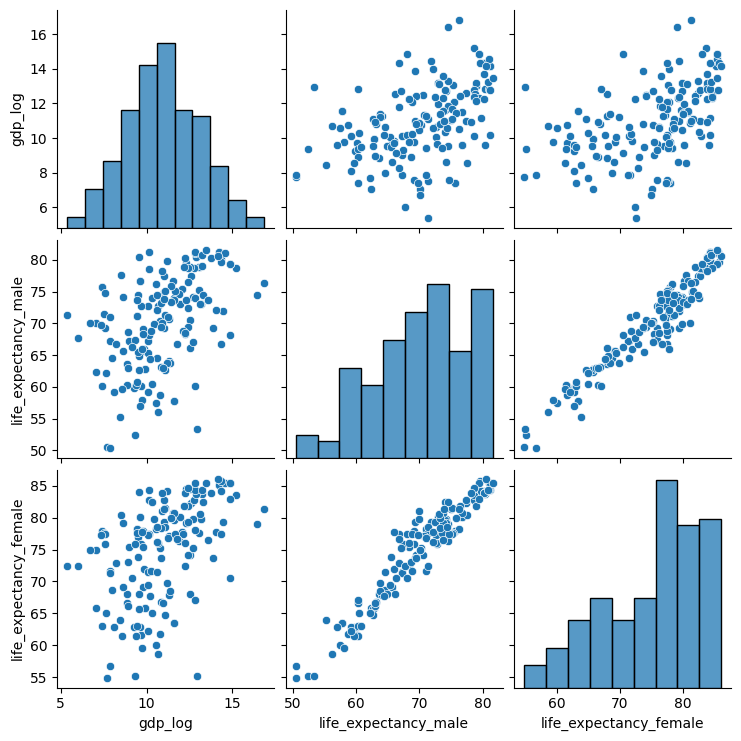

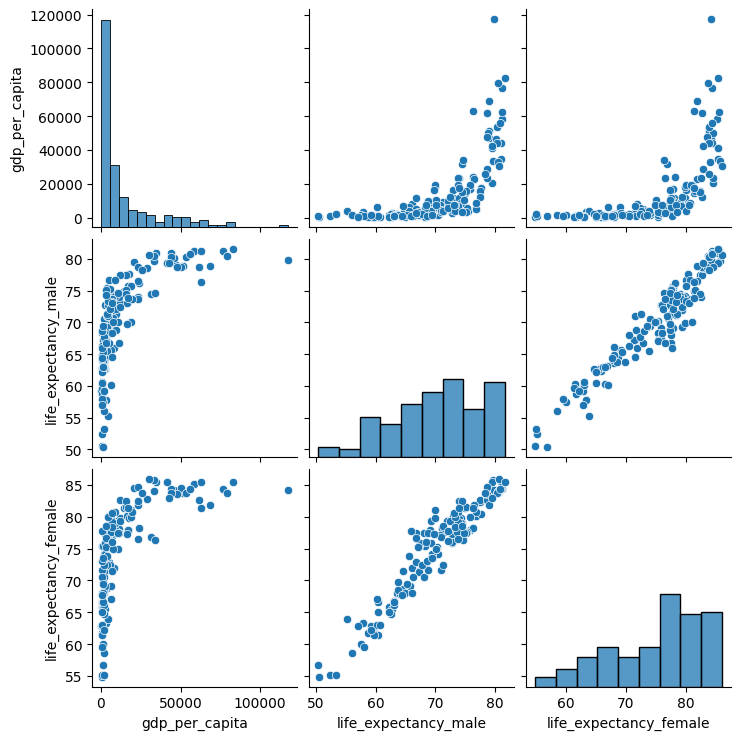

In [ ]:
# Harrison Voss

# For better fit on the graph
df['gdp_log'] = np.log1p(df['gdp'])

sns.pairplot(data=df, vars=['gdp_log', 'life_expectancy_male', 'life_expectancy_female'])
sns.pairplot(data=df, vars=['gdp_per_capita', 'life_expectancy_male', 'life_expectancy_female'])

,iso2,life_expectancy_male,life_expectancy_female,urban_population,internet_users,gdp_per_capita,primary_school_enrollment_male,primary_school_enrollment_female,secondary_school_enrollment_male,secondary_school_enrollment_female,post_secondary_enrollment_female,post_secondary_enrollment_male,fertility,infant_mortality,gdp_log
0,AF,62.8,65.8,25.8,13.5,551.9,124.2,82.9,70.1,40.0,4.9,14.2,4.6,51.7,9.928912
1,AL,76.7,80.1,61.2,71.8,5223.8,105.2,109.1,95.2,95.7,67.6,43.0,1.6,8.0,9.619798
2,DZ,75.4,77.8,73.2,49.0,4114.7,112.4,107.3,97.8,101.5,64.4,38.8,3.0,21.2,12.065419
4,AO,57.8,63.4,66.2,14.3,3437.3,121.1,105.9,61.8,39.7,8.5,10.2,5.6,61.5,11.570279
5,AG,75.7,77.9,24.5,76.0,16727.0,105.4,104.6,113.3,109.1,34.3,15.3,2.0,5.2,7.385231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,UY,73.9,81.3,95.4,74.8,17278.1,109.3,107.6,114.1,126.6,58.0,34.5,2.0,8.7,10.995377
196,UZ,69.4,73.6,50.4,55.2,1555.0,105.0,103.4,93.9,92.7,8.2,11.8,2.4,20.8,10.829748
199,VE,68.4,76.1,88.2,72.0,7212.2,98.3,96.0,84.7,91.6,100.3,59.3,2.3,25.7,12.246922
201,YE,64.4,67.7,37.3,26.7,935.9,99.9,87.1,59.6,43.3,6.2,14.0,3.8,43.2,10.191407


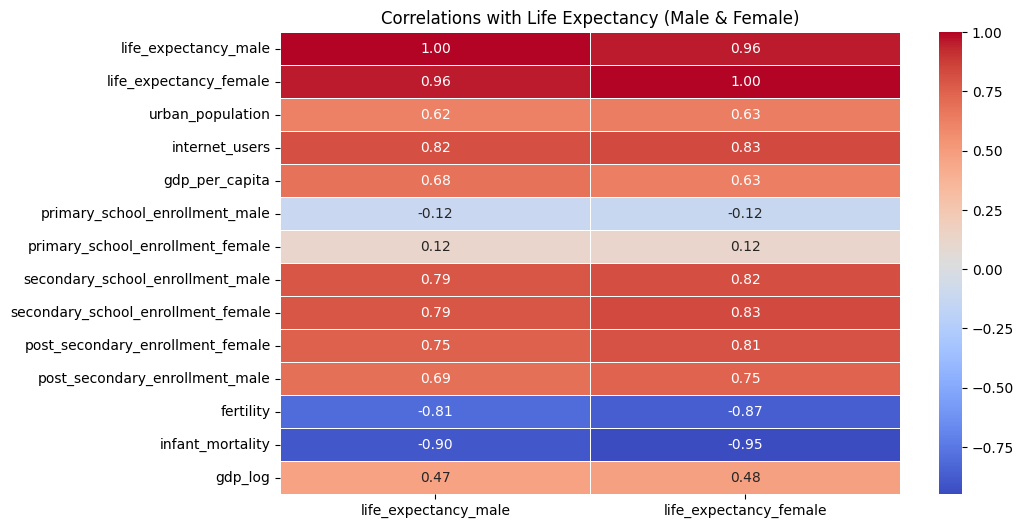

In [ ]:
#Harrison Voss

# Select only numeric columns from the filtered dataframe
df['gdp_log'] = np.log1p(df['gdp'])
df = df.drop(columns=['gdp'])

focusFeatures.remove('gdp')
focusFeatures.append('gdp_log')
display(df[focusFeatures])

numeric_df = df[focusFeatures].select_dtypes(include=[np.number])

# Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Extract the correlations for 'life_expectancy_male' and 'life_expectancy_female'
correlation_with_life_expectancy = correlation_matrix[['life_expectancy_male', 'life_expectancy_female']]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_life_expectancy, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

# Add title
plt.title("Correlations with Life Expectancy (Male & Female)")
plt.show()


In [ ]:
# Haena Jang

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to compare with GDP and GDP per capita
variables = ['unemployment', 'homicide_rate', 'urban_population',
             'internet_users', 'primary_school_enrollment_male', 'primary_school_enrollment_female']


        gdp  sex_ratio  surface_area  life_expectancy_male  unemployment  \
0   20514.0      105.4      652864.0                  62.8          11.2   
1   15059.0      103.7       28748.0                  76.7          12.8   
2  173757.0      102.1     2381741.0                  75.4          11.5   
3    3238.0      102.3         468.0                   NaN           NaN   
4  105902.0       97.9     1246700.0                  57.8           6.8   

   imports  homicide_rate                                   currency iso2  \
0   8370.0            6.7         {'code': 'AFN', 'name': 'Afghani'}   AF   
1   5908.0            2.3             {'code': 'ALL', 'name': 'Lek'}   AL   
2  45140.0            1.4  {'code': 'DZD', 'name': 'Algerian Dinar'}   DZ   
3   1538.0            0.0            {'code': 'EUR', 'name': 'Euro'}   AD   
4  21340.0            4.8          {'code': 'AOA', 'name': 'Kwanza'}   AO   

   employment_services  ...  pop_growth           region  pop_density  \
0      

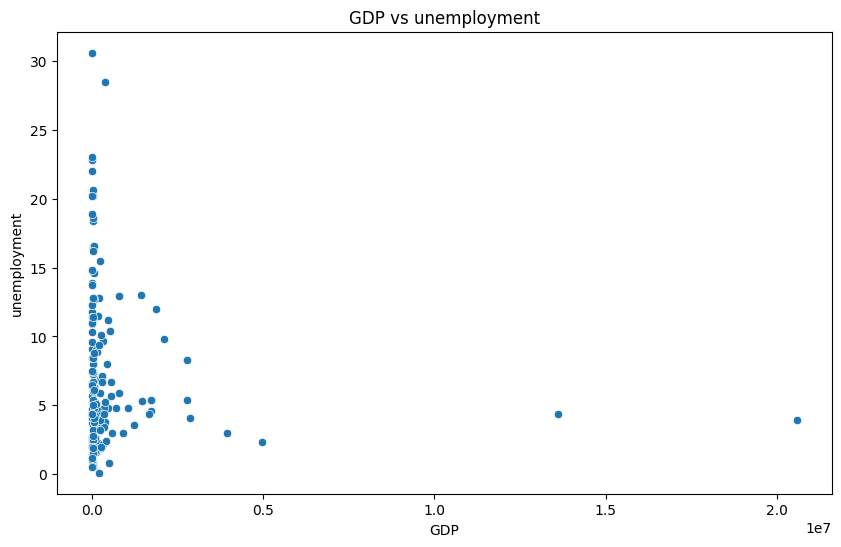

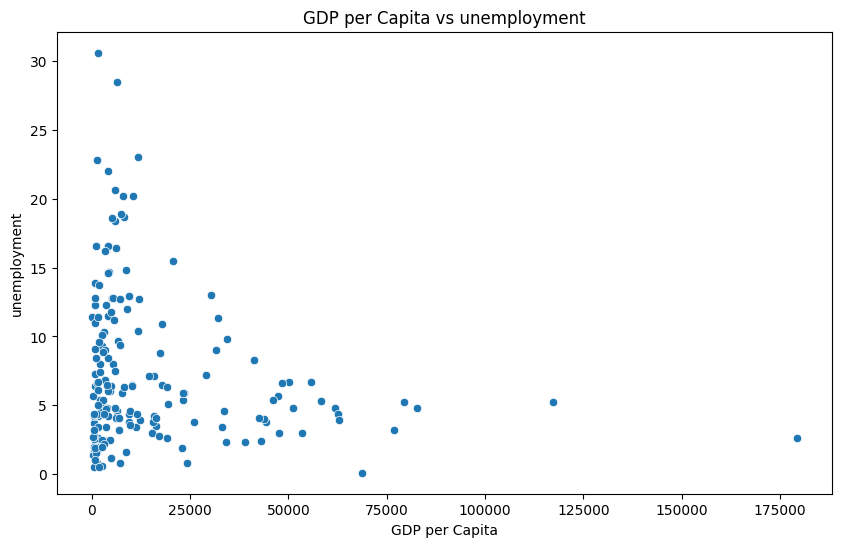

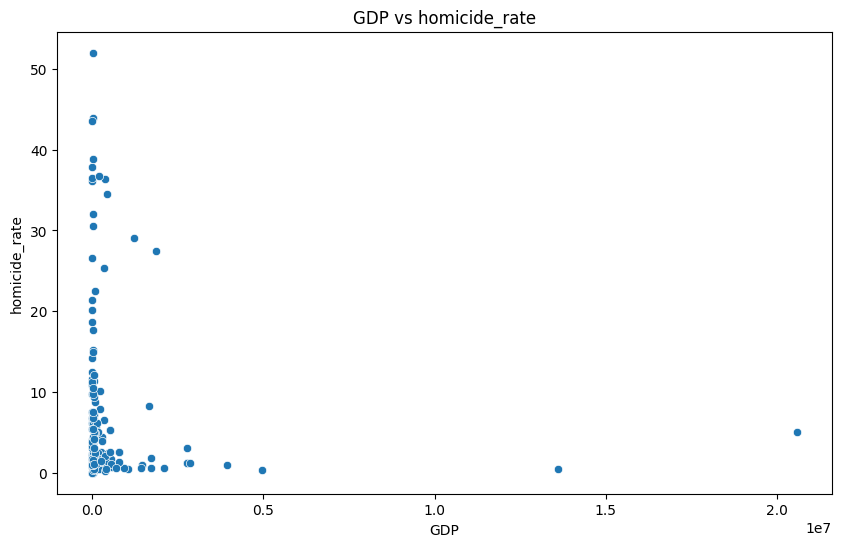

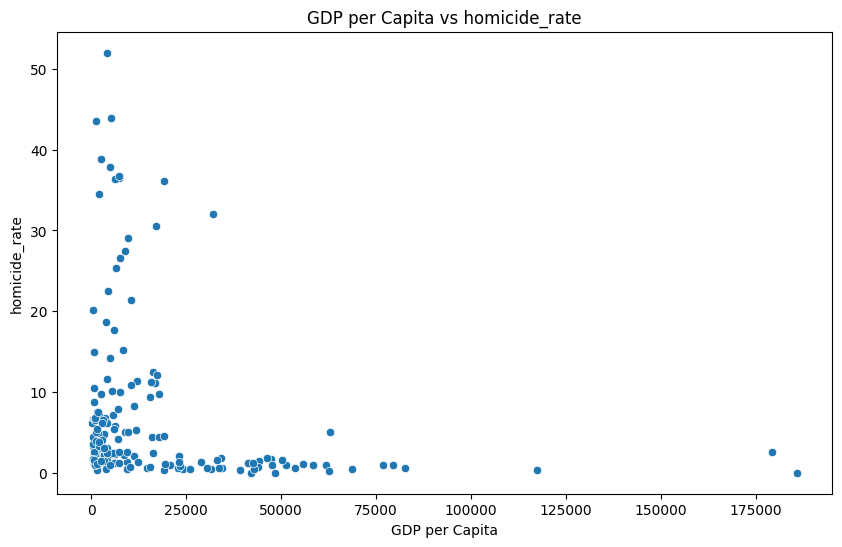

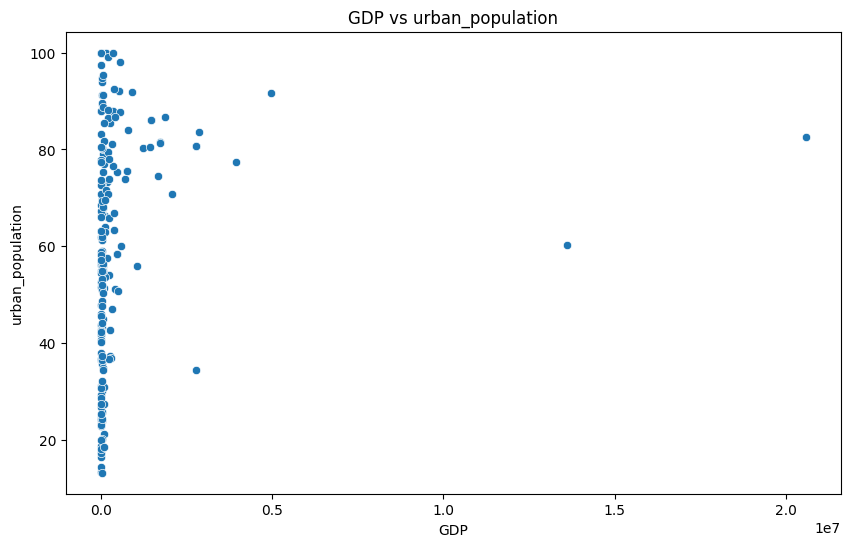

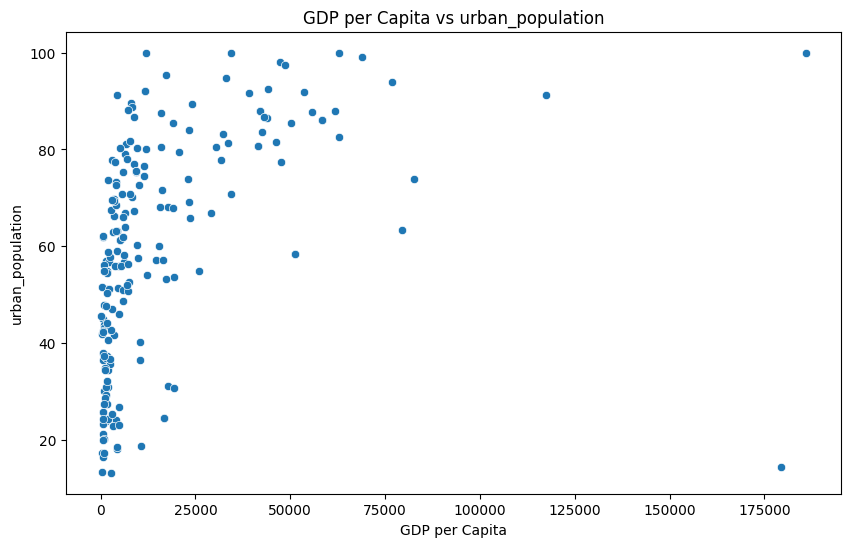

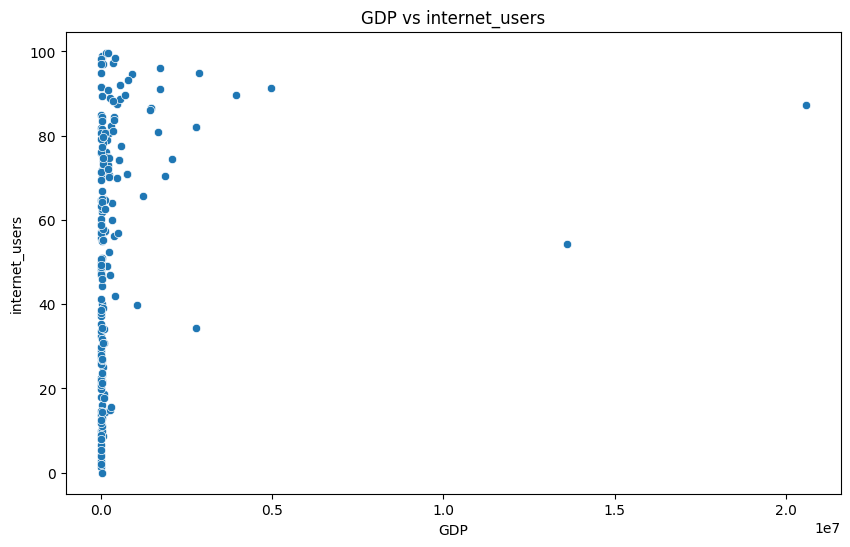

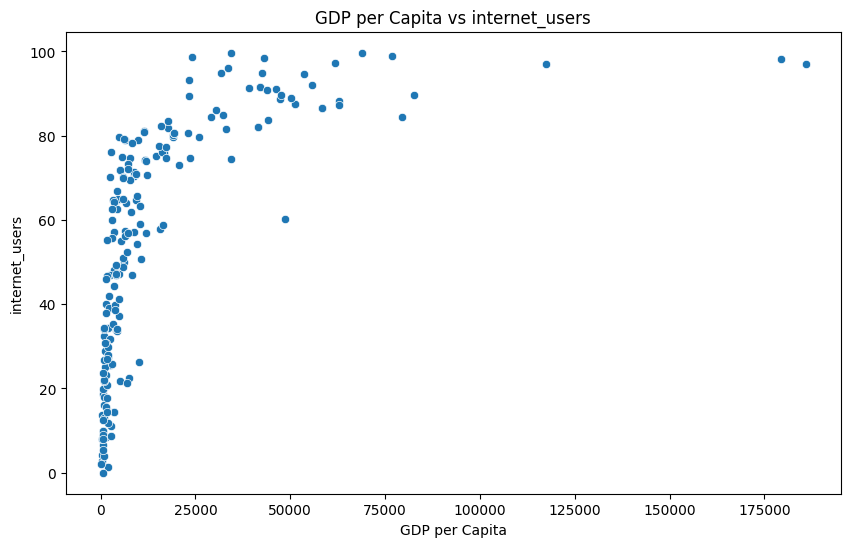

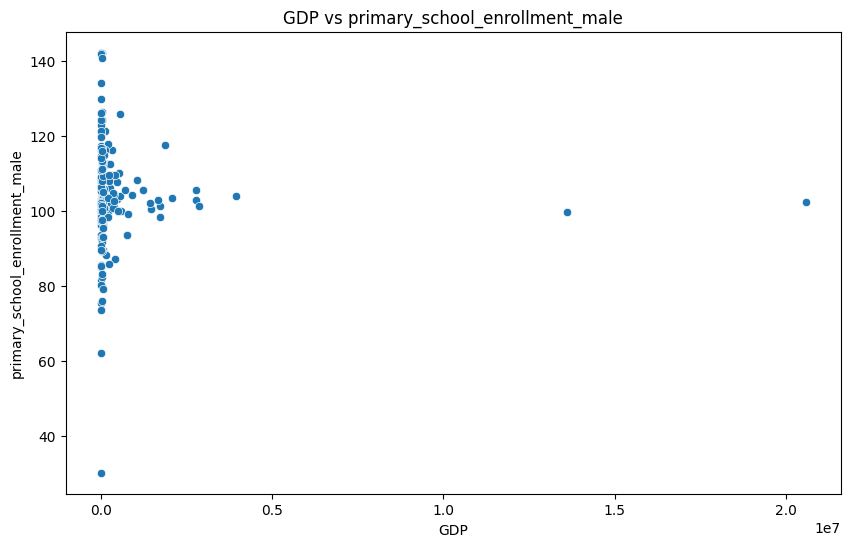

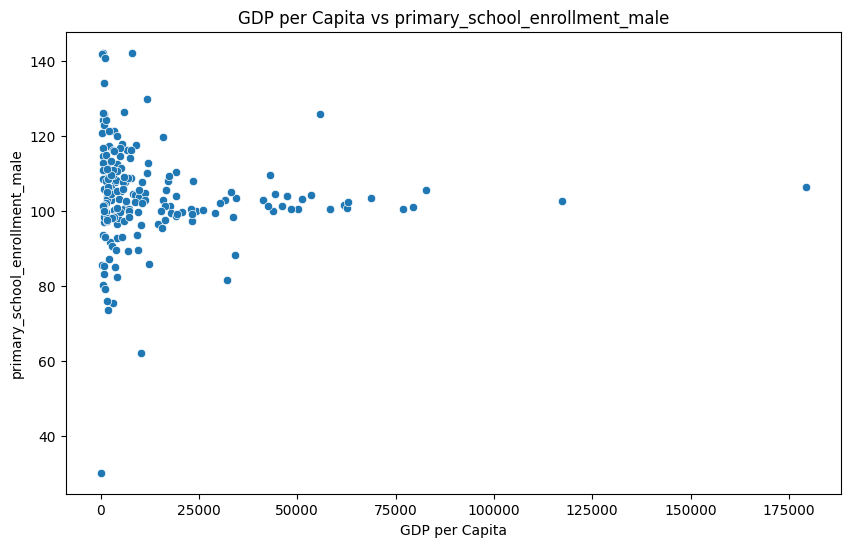

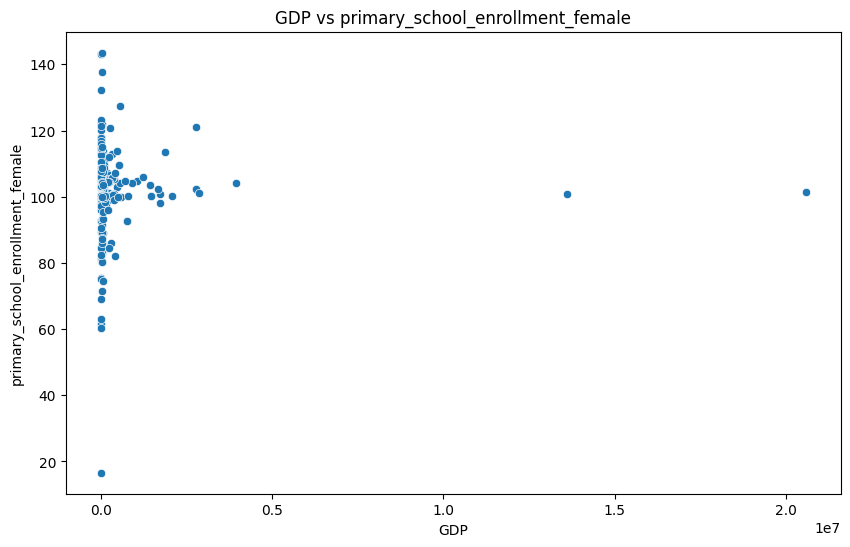

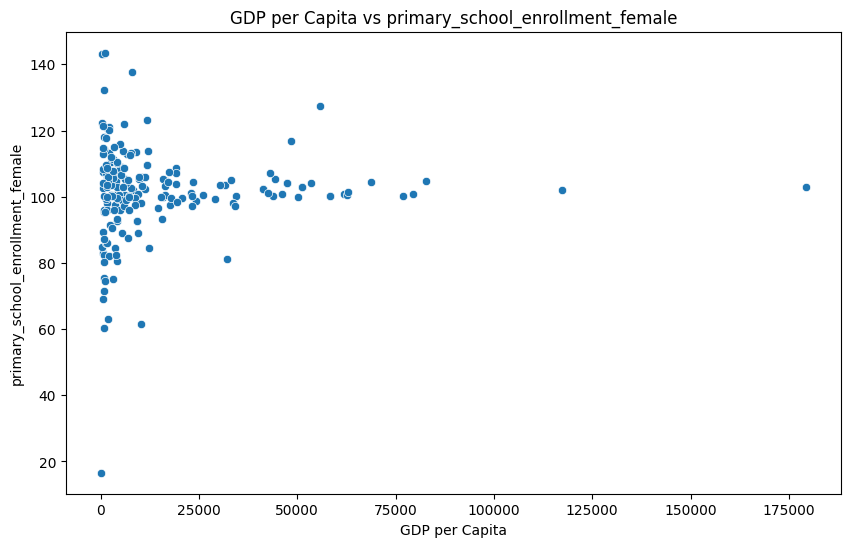

In [ ]:
# Haena Jang

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = 'https://raw.githubusercontent.com/Worm-Warrior/DS_201-Final-Data/refs/heads/main/country_data.csv'
df = pd.read_csv(url)

# Initial exploration (optional, to confirm the data is loaded correctly)
print(df.head())
print(df.info())

# Define the list of variables you want to compare with GDP and GDP per capita
variables = ['unemployment', 'homicide_rate', 'urban_population',
             'internet_users', 'primary_school_enrollment_male', 'primary_school_enrollment_female']

# Loop through the variables and create scatter plots
for var in variables:
    plt.figure(figsize=(10, 6))

    # Scatter plot comparing GDP with the variable
    sns.scatterplot(data=df, x='gdp', y=var)
    plt.title(f'GDP vs {var}')
    plt.xlabel('GDP')
    plt.ylabel(var)
    plt.show()

    # Scatter plot comparing GDP per capita with the variable
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='gdp_per_capita', y=var)
    plt.title(f'GDP per Capita vs {var}')
    plt.xlabel('GDP per Capita')
    plt.ylabel(var)
    plt.show()


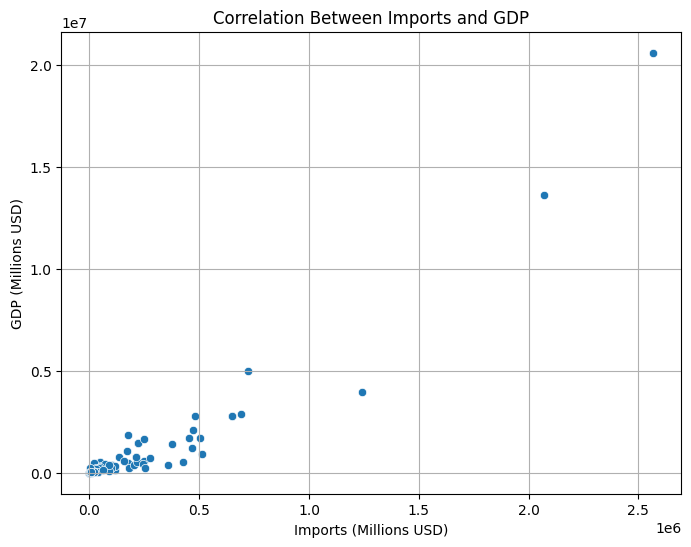

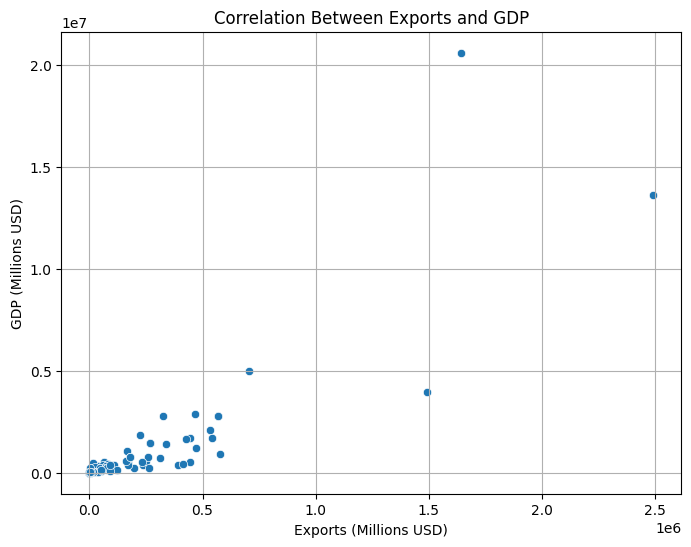

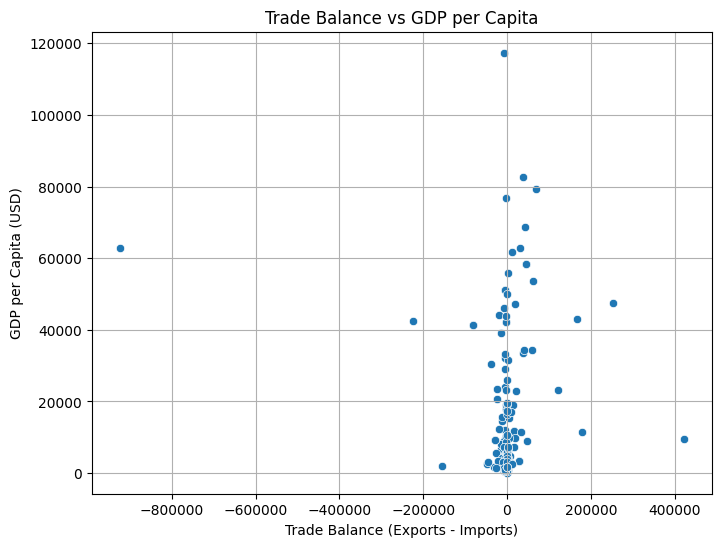

Correlation Analysis:
                 imports   exports  trade_balance       gdp  gdp_per_capita
imports         1.000000  0.956111      -0.288856  0.947256        0.361291
exports         0.956111  1.000000       0.004335  0.856618        0.357647
trade_balance  -0.288856  0.004335       1.000000 -0.433936       -0.064456
gdp             0.947256  0.856618      -0.433936  1.000000        0.181380
gdp_per_capita  0.361291  0.357647      -0.064456  0.181380        1.000000


In [ ]:
#Jack Harris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/Worm-Warrior/DS_201-Final-Data/refs/heads/main/country_data.csv'

df = pd.read_csv(url)

# Calculate the trade balance
df['trade_balance'] = df['exports'] - df['imports']

# Scatter plot for Imports vs GDP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='imports', y='gdp', edgecolor='w')
plt.title("Correlation Between Imports and GDP")
plt.xlabel("Imports (Millions USD)")
plt.ylabel("GDP (Millions USD)")
plt.grid(True)
plt.show()

# Scatter plot for Exports vs GDP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='exports', y='gdp', edgecolor='w')
plt.title("Correlation Between Exports and GDP")
plt.xlabel("Exports (Millions USD)")
plt.ylabel("GDP (Millions USD)")
plt.grid(True)
plt.show()

# Scatter plot for Trade Balance vs GDP per Capita
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='trade_balance', y='gdp_per_capita', edgecolor='w')
plt.title("Trade Balance vs GDP per Capita")
plt.xlabel("Trade Balance (Exports - Imports)")
plt.ylabel("GDP per Capita (USD)")
plt.grid(True)
plt.show()

# Correlation analysis
correlation_analysis = df[['imports', 'exports', 'trade_balance', 'gdp', 'gdp_per_capita']].corr()
print("Correlation Analysis:")
print(correlation_analysis)


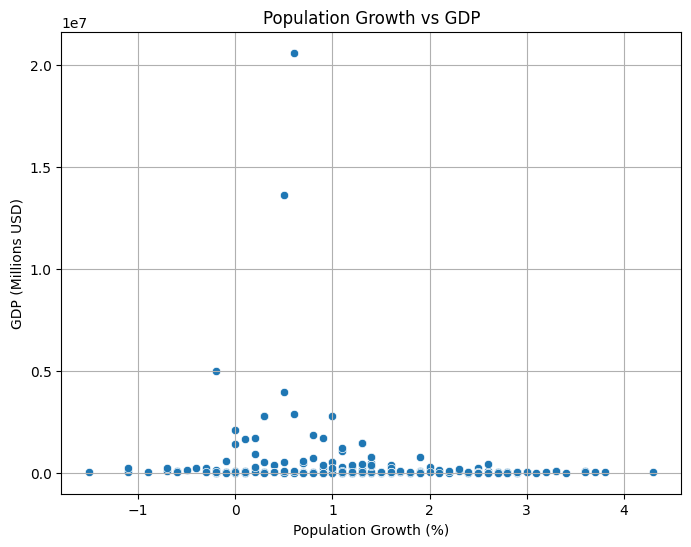

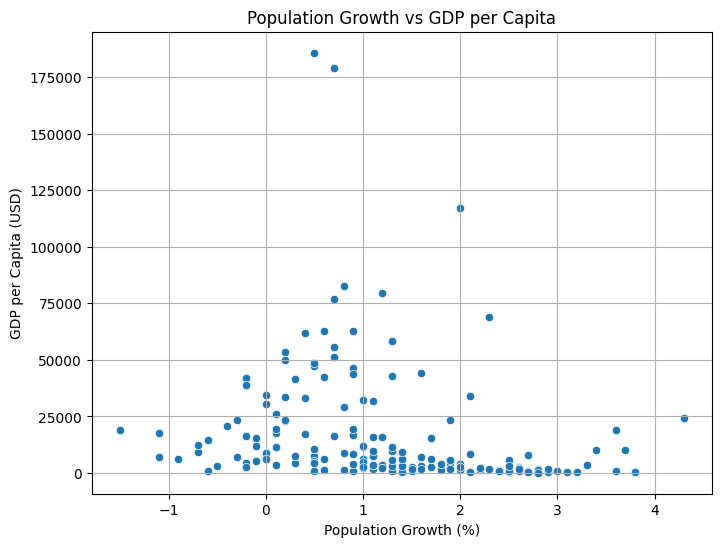

Correlation Analysis:
                pop_growth       gdp  gdp_per_capita
pop_growth        1.000000 -0.135166       -0.244354
gdp              -0.135166  1.000000        0.181380
gdp_per_capita   -0.244354  0.181380        1.000000


In [ ]:
#Jack Harris
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Population Growth vs GDP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pop_growth', y='gdp', edgecolor='w')
plt.title("Population Growth vs GDP")
plt.xlabel("Population Growth (%)")
plt.ylabel("GDP (Millions USD)")
plt.grid(True)
plt.show()

# Scatter plot for Population Growth vs GDP per Capita
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pop_growth', y='gdp_per_capita', edgecolor='w')
plt.title("Population Growth vs GDP per Capita")
plt.xlabel("Population Growth (%)")
plt.ylabel("GDP per Capita (USD)")
plt.grid(True)
plt.show()

# Correlation analysis
population_growth_correlation = df[['pop_growth', 'gdp', 'gdp_per_capita']].corr()
print("Correlation Analysis:")
print(population_growth_correlation)


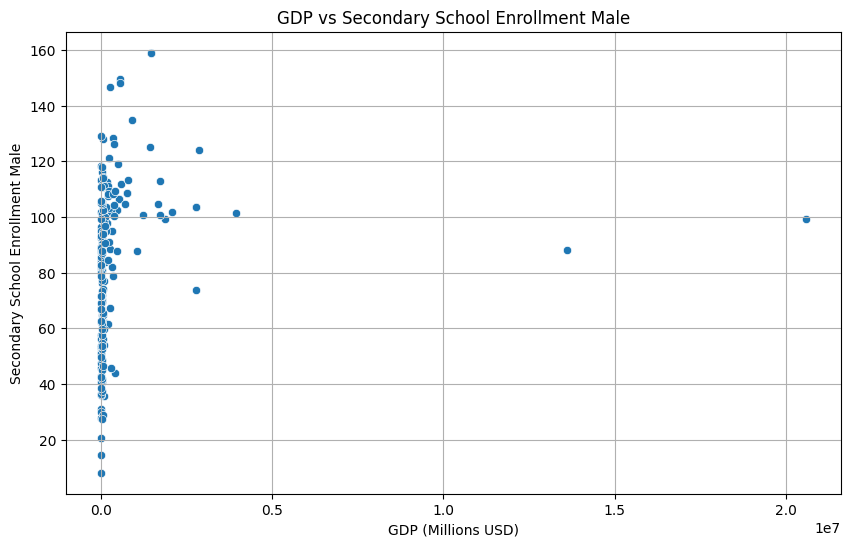

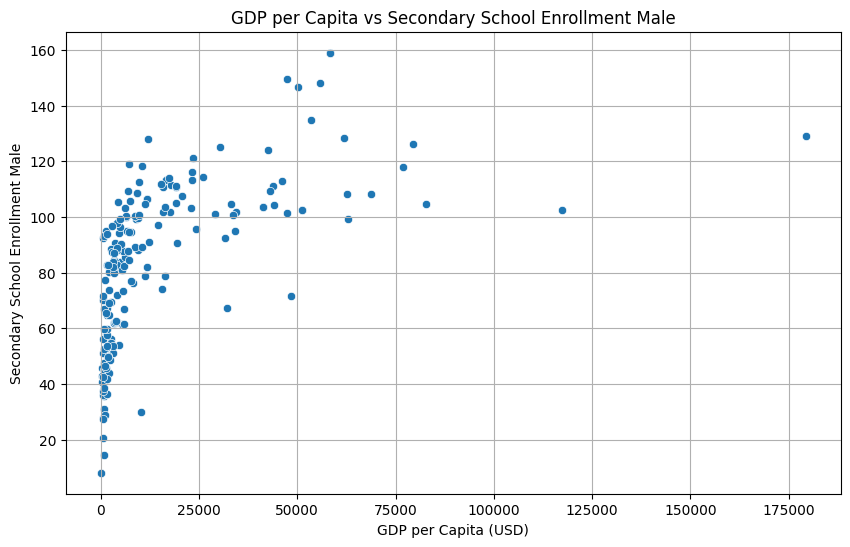

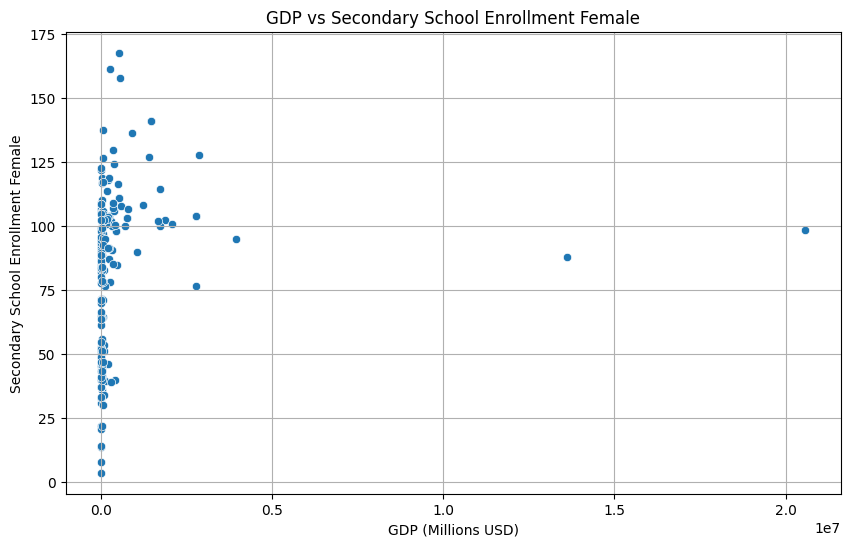

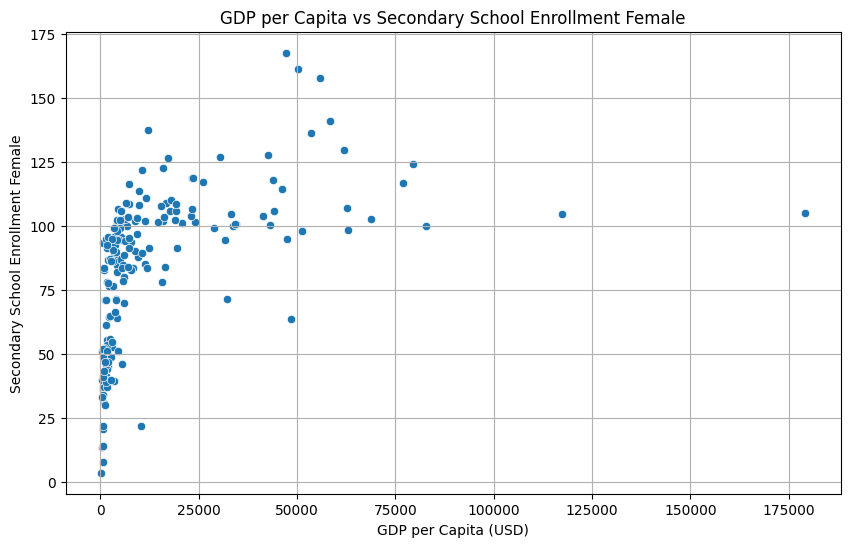

Correlation Analysis:
                                         gdp  gdp_per_capita  \
gdp                                 1.000000        0.206957   
gdp_per_capita                      0.206957        1.000000   
secondary_school_enrollment_male    0.144002        0.562670   
secondary_school_enrollment_female  0.130552        0.494908   

                                    secondary_school_enrollment_male  \
gdp                                                         0.144002   
gdp_per_capita                                              0.562670   
secondary_school_enrollment_male                            1.000000   
secondary_school_enrollment_female                          0.965994   

                                    secondary_school_enrollment_female  
gdp                                                           0.130552  
gdp_per_capita                                                0.494908  
secondary_school_enrollment_male                              0.965994  
seco

In [ ]:
# Ethan Cox

# Import necessry libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/Worm-Warrior/DS_201-Final-Data/refs/heads/main/country_data.csv'
df = pd.read_csv(url)

# Select features for analysis
features = ['secondary_school_enrollment_male', 'secondary_school_enrollment_female']

# Remove rows with missing data for the selected features
df_cleaned = df[['gdp', 'gdp_per_capita'] + features].dropna()

#print(df.head())
#print(df.info())

# Scatter plts for GDP vs Secondary School Enrollment (Male/Female)
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x='gdp', y=feature, edgecolor='w')
    plt.title(f'GDP vs {feature.replace("_", " ").title()}')
    plt.xlabel('GDP (Millions USD)')
    plt.ylabel(feature.replace("_", " ").title())
    plt.grid(True)
    plt.show()

    # Scatter plots for GDP per Capita vs Secondary School Enrollment (Male/Female)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x='gdp_per_capita', y=feature, edgecolor='w')
    plt.title(f'GDP per Capita vs {feature.replace("_", " ").title()}')
    plt.xlabel('GDP per Capita (USD)')
    plt.ylabel(feature.replace("_", " ").title())
    plt.grid(True)
    plt.show()

# Correlation Analysis
correlation_matrix = df_cleaned.corr()
print("Correlation Analysis:")
print(correlation_matrix)

In [ ]:
# Harrison Voss

# Compair our first pick of Linear Regression to other models.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load the data
url = 'https://raw.githubusercontent.com/Worm-Warrior/DS_201-Final-Data/refs/heads/main/country_data.csv'
df = pd.read_csv(url)

# Focus Features
focusFeatures = ['gdp','life_expectancy_male','life_expectancy_female','urban_population','internet_users',
                 'gdp_per_capita','primary_school_enrollment_male','primary_school_enrollment_female',
                 'secondary_school_enrollment_male','secondary_school_enrollment_female',
                 'post_secondary_enrollment_female','post_secondary_enrollment_male', 'fertility', 'infant_mortality']

# Preprocessing
df = df[focusFeatures]
df = df.dropna().reindex()
df['gdp_log'] = np.log1p(df['gdp'])
df = df.drop(columns=['gdp'])
df['life_expectancy_avg'] = (df['life_expectancy_male'] + df['life_expectancy_female']) / 2

# Define features and target
X = df.drop(columns=['life_expectancy_male', 'life_expectancy_female', 'life_expectancy_avg'])
print(X.columns)
y = df['life_expectancy_avg']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor()
}

# Evaluate models
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_score = cross_val_score(model, X, y, cv=6)

    # Print results
    print(f"\nModel: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R²: {r2:.4f}")
    print(f"Cross-Validation MSE Score: {cv_score.mean()}")



Index(['urban_population', 'internet_users', 'gdp_per_capita',
       'primary_school_enrollment_male', 'primary_school_enrollment_female',
       'secondary_school_enrollment_male',
       'secondary_school_enrollment_female',
       'post_secondary_enrollment_female', 'post_secondary_enrollment_male',
       'fertility', 'infant_mortality', 'gdp_log'],
      dtype='object')

Model: Linear Regression
Mean Absolute Error (MAE): 1.15
Mean Squared Error (MSE): 2.03
R²: 0.9606
Cross-Validation MSE Score: 0.8914357099268119

Model: Random Forest
Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 2.72
R²: 0.9472
Cross-Validation MSE Score: 0.8698336600453263

Model: KNN
Mean Absolute Error (MAE): 2.95
Mean Squared Error (MSE): 14.82
R²: 0.7124
Cross-Validation MSE Score: 0.5896885839067223

Model: SVR
Mean Absolute Error (MAE): 3.85
Mean Squared Error (MSE): 24.24
R²: 0.5295
Cross-Validation MSE Score: 0.5033209671156249

Model: Decision Tree
Mean Absolute Error (MAE): 1.99
Mean Squa

In [ ]:
# Harrison Voss

# Test to see if adding anymore features would help the model be more accurate

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/Worm-Warrior/DS_201-Final-Data/refs/heads/main/country_data.csv'

df = pd.read_csv(url)

df = df.dropna()

df['gdp_log'] = np.log1p(df['gdp'])

df['life_expectancy_avg'] = (df['life_expectancy_male'] + df['life_expectancy_female']) / 2

focusFeatures = list(focusFeatures)


# Remove the unwanted columns
focusFeatures.remove('life_expectancy_male')
focusFeatures.remove('life_expectancy_female')


# Baseline features
baseline_features = focusFeatures
X = df[baseline_features]
y = df['life_expectancy_avg']
df = df.drop(columns=['iso2','currency','capital','name','region','life_expectancy_avg','life_expectancy_male','life_expectancy_female'])
df = df.drop(columns=focusFeatures)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Baseline performance
mae_baseline = mean_absolute_error(y_test, y_pred)
mse_baseline = mean_squared_error(y_test, y_pred)
r2_baseline = r2_score(y_test, y_pred)

print("Baseline Performance:")
print(f"MAE: {mae_baseline:.2f}, MSE: {mse_baseline:.2f}, R²: {r2_baseline:.4f}")

# Feature addition loop
new_features = df.columns

lowered_scores = []
raised_scores = []

for feature in new_features:
    X_new = X.join(df[[feature]])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Train new model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if (mae > mae_baseline or mse > mse_baseline or r2 < r2_baseline):
      print("Lower Score: " + feature)
      print(f"After Adding {feature}:")
      print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.4f}")
      lowered_scores.append(feature)
    else:
      print('Higher Score: ' + feature)
      print(f"After Adding {feature}:")
      print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.4f}")
      raised_scores.append(feature)

print("LOWER:\n" + str(lowered_scores))
print("HIGHER:\n"+  str(raised_scores))

Baseline Performance:
MAE: 1.22, MSE: 2.49, R²: 0.8721
Lower Score: sex_ratio
After Adding sex_ratio:
MAE: 1.25, MSE: 2.69, R²: 0.8617
Lower Score: surface_area
After Adding surface_area:
MAE: 1.26, MSE: 2.99, R²: 0.8466
Lower Score: unemployment
After Adding unemployment:
MAE: 1.23, MSE: 2.59, R²: 0.8670
Lower Score: imports
After Adding imports:
MAE: 1.33, MSE: 2.88, R²: 0.8523
Lower Score: homicide_rate
After Adding homicide_rate:
MAE: 1.35, MSE: 2.81, R²: 0.8555
Lower Score: employment_services
After Adding employment_services:
MAE: 1.27, MSE: 2.62, R²: 0.8657
Lower Score: employment_industry
After Adding employment_industry:
MAE: 1.25, MSE: 2.66, R²: 0.8636
Lower Score: urban_population_growth
After Adding urban_population_growth:
MAE: 1.31, MSE: 2.99, R²: 0.8462
Higher Score: employment_agriculture
After Adding employment_agriculture:
MAE: 1.21, MSE: 2.48, R²: 0.8727
Lower Score: forested_area
After Adding forested_area:
MAE: 1.28, MSE: 2.64, R²: 0.8644
Lower Score: exports
After

In [ ]:
# Harrison Voss
# Model and predict with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

url = 'https://raw.githubusercontent.com/Worm-Warrior/DS_201-Final-Data/refs/heads/main/country_data.csv'

df = pd.read_csv(url)
focusFeatures = ['gdp','life_expectancy_male','life_expectancy_female','urban_population','internet_users',
                 'gdp_per_capita','primary_school_enrollment_male','primary_school_enrollment_female',
                 'secondary_school_enrollment_male','secondary_school_enrollment_female',
                 'post_secondary_enrollment_female','post_secondary_enrollment_male', 'fertility', 'infant_mortality']

df = df[focusFeatures] # Make the dataframe only have the relevant categories.

df = df.dropna().reindex() # Now we cull any rows that have NaN values

# We do not use GDP, instead we use GDP log.
df['gdp_log'] = np.log1p(df['gdp'])
df = df.drop(columns=['gdp'])
df.reindex()
focusFeatures = df.columns
#print(focusFeatures)

# We want to find out about both male and female life expectancy, so we will average them.
df['life_expectancy_avg'] = (df['life_expectancy_male'] + df['life_expectancy_female']) / 2

focusFeatures = list(focusFeatures)

focus_x = focusFeatures

focus_x.remove('life_expectancy_male')
focus_x.remove('life_expectancy_female')

model = LinearRegression()

# Define features and target
X = df[focus_x]
y = df['life_expectancy_avg']
print(X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R^2)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2: {r2}")

# Cross validation score
cross_val_score(model, X, y, cv=6)

Index(['urban_population', 'internet_users', 'gdp_per_capita',
       'primary_school_enrollment_male', 'primary_school_enrollment_female',
       'secondary_school_enrollment_male',
       'secondary_school_enrollment_female',
       'post_secondary_enrollment_female', 'post_secondary_enrollment_male',
       'fertility', 'infant_mortality', 'gdp_log'],
      dtype='object')
Mean Absolute Error (MAE): 1.145404685710484
Mean Squared Error (MSE): 2.0277904437195753
R^2: 0.9606479974315439


array([0.8917506 , 0.94546581, 0.90274815, 0.86069618, 0.8647085 ,
       0.88324502])

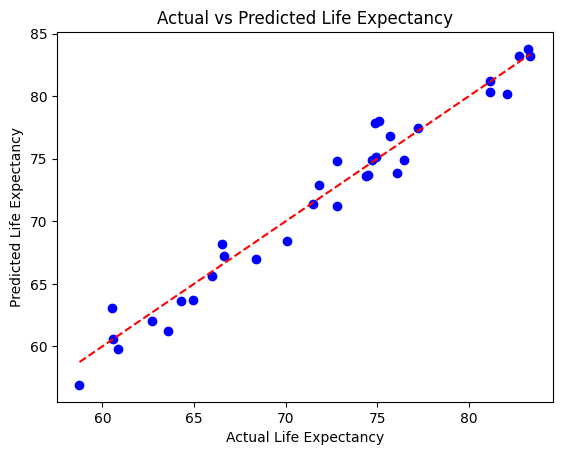

In [ ]:
# Harrison Voss
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()
